In [1]:
import pandas as pd, numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import seaborn as sns

# Q1. Basic Data Understanding


1.1 Read data from ‘reviews.csv’ and ‘products.csv’


In [3]:
corp1 = pd.read_csv(r"C:\Users\hp\Desktop\deep learning\graded 2\reviews.csv")
corp2 = pd.read_csv(r"C:\Users\hp\Desktop\deep learning\graded 2\product_data.csv")


In [4]:
corp1.head(3)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0


In [5]:
corp2.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0


1.2 Print shape of both the dataframes

In [6]:
corp1.shape

(67986, 8)

In [7]:
corp2.shape

(720, 10)

1.3 Print types of columns for both the dataframes

In [8]:
corp1.dtypes

asin             object
name             object
rating            int64
date             object
verified           bool
title            object
body             object
helpfulVotes    float64
dtype: object

In [9]:
corp2.dtypes

asin              object
brand             object
title             object
url               object
image             object
rating           float64
reviewUrl         object
totalReviews       int64
price            float64
originalPrice    float64
dtype: object

# Q2. Basic Data Analysis [20 Marks]

2.1 Drop all columns except: asin, rating, title, body from reviews And Drop all columns except: asin, brand from products [3 Marks]

In [10]:
corp1.drop(['name', 'date','verified','helpfulVotes'], axis=1, inplace=True)

In [11]:
corp2.drop(['title','url','image','rating','reviewUrl','totalReviews','price','originalPrice'], axis=1, inplace=True)

In [12]:
corp1.head(3)

,asin,rating,title,body
0,B0000SX2UC,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,5,Love This Phone,"This is a great, reliable phone. I also purcha..."


In [13]:
corp2.head(3)

,asin,brand
0,B0000SX2UC,NaN
1,B0009N5L7K,Motorola
2,B000SKTZ0S,Motorola


2.2 Verify and drop all null values from both the tables [3 Marks]

In [14]:
corp1.isnull().sum()

asin       0
rating     0
title     14
body      21
dtype: int64

In [15]:
corp2.isnull().sum()

asin     0
brand    4
dtype: int64

In [16]:
corp1.dropna(inplace=True)

In [17]:
corp2.dropna(inplace=True)

2.3 Merge both the tables on key ‘asin’ [3 Marks]

In [18]:
corp1.head()

,asin,rating,title,body
0,B0000SX2UC,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,B0000SX2UC,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [19]:
corp2.head()

,asin,brand
1,B0009N5L7K,Motorola
2,B000SKTZ0S,Motorola
3,B001AO4OUC,Motorola
4,B001DCJAJG,Motorola
5,B001GQ3DJM,Nokia


In [20]:
corp=pd.merge(corp1, corp2, on='asin')

In [21]:
corp.head()

,asin,rating,title,body,brand
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola


2.3 Check the statistical summary of ‘rating’ and share insights [2 Marks]


In [22]:
corp.describe()

,rating
count,67756.000000
mean,3.807840
std,1.583129
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [23]:
corp.rating.value_counts()

5    37630
1    12708
4     8786
3     4738
2     3894
Name: rating, dtype: int64

2.4 Visualize a countplot for rating and share insights [3 Marks]

C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

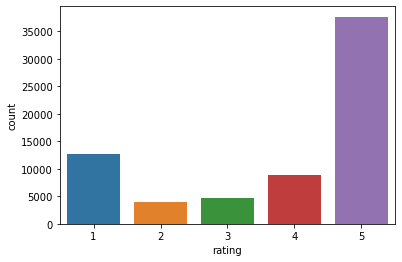

In [24]:
sns.countplot(corp.rating)

2.5 Visualize distribution of ‘brand’ and share insights [3 Marks]

In [25]:
corp.brand.value_counts()

Samsung     33604
Motorola     8879
Nokia        5914
Apple        5144
Xiaomi       4411
Google       3786
Sony         3195
HUAWEI       2225
OnePlus       347
ASUS          251
Name: brand, dtype: int64

<AxesSubplot:>

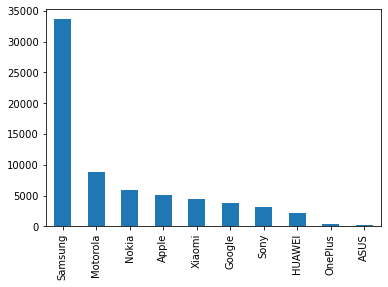

In [26]:
corp.brand.value_counts().plot(kind='bar')

2.6 Visualize distribution of ‘rating’ and share insights [3 Marks]

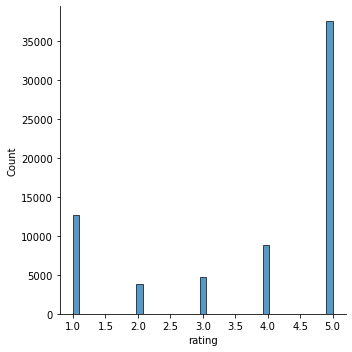

In [27]:
sns.displot(corp.rating)

C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

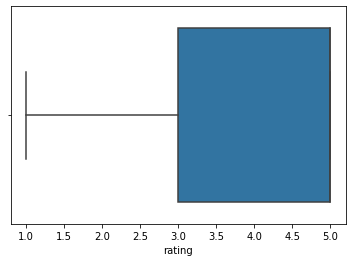

In [28]:
sns.boxplot(corp.rating)

# Q3. Data Preparation [5 Marks]

Insert new Column in DataFrame ‘Sentiment’ and
Assign Sentiment= 1 when Rating >3;
Sentiment= -1 when Rating <3 and
Sentiment= 0 when rating = 3.
(This step is to create target class where 1 indicates positive sentiment, -1 indicates
negative sentiment and 0 indicates neutral sentiment)

In [29]:
conditions = [
    (corp['rating'] >3),
    (corp['rating'] <3),
    (corp['rating'] ==3)
    ]

values = [1,-1,0]

corp['Sentiment'] = np.select(conditions, values)
corp.head()

,asin,rating,title,body,brand,Sentiment
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,-1
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola,1
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,-1
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola,1


# Q4. Data Visualization [5 Marks]

4.1 Visualize distribution of ‘sentiment’ and share insights [3 Marks]


<AxesSubplot:>

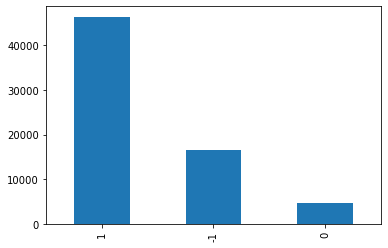

In [30]:
corp.Sentiment.value_counts().plot(kind='bar')

4.2 Visualize a crosstab of ‘brand’ with sentiment [2 Marks]


In [31]:
pd.crosstab(corp.brand, corp.Sentiment)

Sentiment,-1,0,1
brand,,,
ASUS,64,25,162
Apple,1434,322,3388
Google,1168,267,2351
HUAWEI,309,124,1792
Motorola,2104,653,6122
Nokia,1710,540,3664
OnePlus,52,13,282
Samsung,8531,2292,22781
Sony,770,280,2145


<AxesSubplot:xlabel='brand'>

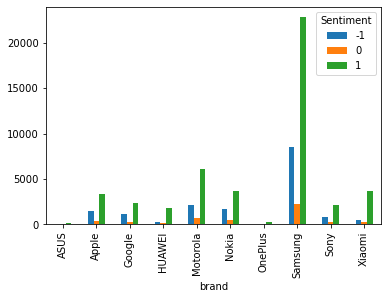

In [38]:
pd.crosstab(corp.brand, corp.Sentiment).plot(kind='bar')

# Q5. Textual Data Pre-processing [15 Marks]

5.1 Lowercase all data in columns ‘title’ and ‘body’ [3 Marks]


In [39]:
corp["title"] = corp["title"].str.lower()

In [40]:
corp["body"] = corp["body"].str.lower()

5.2 Remove all punctuations from columns ‘title’ and ‘body’ [3 Marks]


In [41]:
corp["title"] = corp['title'].str.replace('[^\w\s]','')
corp["body"] = corp['body'].str.replace('[^\w\s]','')


<ipython-input-41-860f247bad14>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  corp["title"] = corp['title'].str.replace('[^\w\s]','')
<ipython-input-41-860f247bad14>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  corp["body"] = corp['body'].str.replace('[^\w\s]','')


In [42]:
corp.head()

,asin,rating,title,body,brand,Sentiment
0,B0009N5L7K,1,stupid phone,dont buy out of service,Motorola,-1
1,B0009N5L7K,4,exellent service,i have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,i love it,i just got it and have to say its easy to use ...,Motorola,1
3,B0009N5L7K,1,phones locked,1 star because the phones locked so i have to ...,Motorola,-1
4,B0009N5L7K,5,excellent product,the product has been very good i had used this...,Motorola,1


5.3 Remove stopwords from columns ‘title’ and ‘body’ [3 Marks]

In [43]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [44]:
import re

corp['title'] = corp['title'].apply(lambda x: re.findall("[\w']+", x))
corp['body'] = corp['body'].apply(lambda x: re.findall("[\w']+", x))

In [45]:
def remove_stopwords(x):
  return [w.lower() for w in x if not w.lower() in stop]

In [46]:
corp['title'] = corp['title'].map(remove_stopwords)
corp['body'] = corp['body'].map(remove_stopwords)

In [47]:
corp.head()

,asin,rating,title,body,brand,Sentiment
0,B0009N5L7K,1,"[stupid, phone]","[dont, buy, service]",Motorola,-1
1,B0009N5L7K,4,"[exellent, service]","[nextel, nearly, year, started, time, last, ye...",Motorola,1
2,B0009N5L7K,5,[love],"[got, say, easy, use, hear, person, talking, f...",Motorola,1
3,B0009N5L7K,1,"[phones, locked]","[1, star, phones, locked, pay, additional, fee...",Motorola,-1
4,B0009N5L7K,5,"[excellent, product]","[product, good, used, cell, phone, one, projec...",Motorola,1


5.4 Transform ‘body’ using TF-IDF vectorizer [3 Marks]

5.5 Split data into X and Y. [3 Marks]
(Vectorized data should be X and sentiment should be Y.)


In [48]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_word(x):
  return [lemmatizer.lemmatize(w,pos='v') for w in x]
  
corp['body'] = corp['body'].map(lemmatize_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
corp['body']=corp['body'].apply(lambda x: ' '.join(x))

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corp['body'])

In [51]:
X.shape

(67756, 41694)

In [52]:
x = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())

In [53]:
y=corp['Sentiment']

# Q6. Model Building [5 Marks]


6.1 Split data into 80% train and 20% test data [1 Marks]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42,stratify=corp['Sentiment'])

6.2 Build a Classification model to predict sentiment [2 Marks]


In [55]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [56]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7993321526086635

6.3 Print accuracy score for train and test data both [1 Marks]


In [57]:
y_pred = model.predict(X_test)

In [58]:
y_pred_train=model.predict(X_train)

In [59]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))

0.7993321526086635
0.7875590318772137


6.4 State whether model is underfitting / Overfitting / Good fit [1 Marks]


Normal MultinomialNB model performs similarly on both the datasets.